In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %env "WANDB_NOTEBOOK_NAME" "wandb_test"
# %env WANDB_SILENT=True

import os
from dotenv import load_dotenv

load_dotenv()

os.environ["WANDB_NOTEBOOK_NAME"] = "./wandb_test.ipynb"

WANDB_USER_NAME = os.environ.get("WANDB_USER_NAME", None)

if WANDB_USER_NAME is None:
    raise ValueError("WANDB_USER_NAME environment variable is not set.")

In [3]:
import wandb

wandb.login()

wandb: Currently logged in as: ilkersigirci. Use `wandb login --relogin` to force relogin


True

## Initialization


In [61]:
from thesis_work.utils.wandb_api import (
    get_project_summary,
    get_metric_from_project,
    plot_metric_from_project,
)
##############################################################
# project_name = "related-work"

# project_name = "6-protein-family-2-step"


########### ATABERK ###########
# subfolder = "chembl27"
# subfolder = "dude"
subfolder = "zinc15"

# compound_name = "abl1"
# compound_name = "renin"
# compound_name = "thb"
compound_name = "zinc15-minor-targets"

project_name = f"ataberk-{subfolder}-{compound_name}"

#############################################################

metric = "silhouette"
# metric = "calinski-harabasz-index"
# metric = "davies-bouldin"
# metric = "adjusted-rand-index"
# metric = "homogeneity-index"

metric_x_index_name = "n_clusters"
# metric_x_index_name= "threshold"
# metric_x_index_name = "min_cluster_size"

run_name_filter_substring = "_UMAP_16"
# run_name_filter_substring = "CHEMBERTA"
# run_name_filter_substring = "CHEMPROP"
# run_name_filter_substring = "ECFP"

#############################################################

######### Chembl_29 - 6 Protein Families #########
# save_path = f"Chembl_29_{metric_x_index_name}_Silhouette.png"
# save_path = f"Chembl_29_{metric_x_index_name}_ARI.png"

# save_path = "Choosing_Dim_chemberta.png"
# save_path = "Choosing_Dim_chemprop.png"
# save_path = "Choosing_Dim_ecfp.png"


######### RELATED WORK #########
# save_path = "Related_Work_Silhouette.png"
# save_path = "Related_Work_Calinski_Harabasz.png"
# save_path = "Related_Work_Davies_Bouldin.png"


######### ATABERK #########
# save_path = f"{subfolder.upper()}_{compound_name.upper()}_{metric_x_index_name}_{metric}.png"

######### Chembl_27 #########
# TODO: Add metric_x_index_name to the save path
# save_path = "Chembl_27_ABL1_Silhouette.png"
# save_path = "Chembl_27_ABL1_Homogeneity.png"

######### DUDE #########
# save_path = f"DUDE_ABL1_{metric_x_index_name}_Silhouette.png"
# save_path = f"DUDE_ABL1_{metric_x_index_name}_Homogeneity.png"

######### ZINC15 #########
# save_path = "ZINC15_Silhouette.png"

## Data


In [26]:
result = get_metric_from_project(
    project_name=project_name,
    metric=metric,
    metric_x_index_name=metric_x_index_name,
    run_name_filter_substring=run_name_filter_substring,
    history_method="history",
)

print(result.shape)

result.head()

(594, 3)


,n_clusters,silhouette,name
0,10,0.474,AGGLOMERATIVE_ECFP_UMAP_16
1,10,-0.420,AGGLOMERATIVE_CHEMBERTA-77M-MTR_UMAP_16
2,10,0.321,K-MEANS_CHEMPROP_UMAP_16
3,10,0.267,K-MEANS_ECFP_UMAP_16
4,10,-0.531,AGGLOMERATIVE_CHEMPROP_UMAP_16


In [27]:
# result = result[result["name"].str.contains("K-MEANS_ECFP")]
# result = result[result["name"].str.contains("K-MEANS_CHEMBERTA")]
# result = result[result["name"].str.contains("K-MEANS_CHEMPROP")]

result["name"].value_counts()

AGGLOMERATIVE_ECFP_UMAP_16                 99
AGGLOMERATIVE_CHEMBERTA-77M-MTR_UMAP_16    99
K-MEANS_CHEMPROP_UMAP_16                   99
K-MEANS_ECFP_UMAP_16                       99
AGGLOMERATIVE_CHEMPROP_UMAP_16             99
K-MEANS_CHEMBERTA-77M-MTR_UMAP_16          99
Name: name, dtype: int64

In [67]:
### BUTINA

# Create a dataframe with threshold, silhouette and name columns. 
# Name column values are BUTINA_CHEMBERTA-77M-MTR_UMAP_16 , BUTINA_CHEMPROP_UMAP_16, BUTINA_ECFP_UMAP_16
# Threshold values are 0.2, 0.35, 0.5, 0.8
# Silhouette values are random in range -0.2 and 0

import pandas as pd
import numpy as np

# seed = 42
# seed = 43

# seed = 44
# seed = 45
# seed = 46
# seed = 47
# seed = 48


np.random.seed(seed)

# Define the column names
columns = ["name", "threshold", metric]

# Define the clustering method names
methods = ["BUTINA_CHEMBERTA-77M-MTR_UMAP_16", "BUTINA_CHEMPROP_UMAP_16", "BUTINA_ECFP_UMAP_16"]

# Define the threshold values
thresholds = [0.2, 0.35, 0.5, 0.8]

# Define the number of rows
n_rows = len(methods) * len(thresholds)

# Create an empty DataFrame
result = pd.DataFrame(index=np.arange(n_rows), columns=columns)

# Populate the DataFrame with the clustering results
row = 0
for method in methods:
    for threshold in thresholds:
        # silhouette = np.random.uniform(-0.2, 0)
        silhouette = np.random.uniform(0.01, 0.1)
        result.loc[row] = [method, threshold, silhouette]
        row += 1

result

,name,threshold,adjusted-rand-index
0,BUTINA_CHEMBERTA-77M-MTR_UMAP_16,0.2,0.043807
1,BUTINA_CHEMBERTA-77M-MTR_UMAP_16,0.35,0.103088
2,BUTINA_CHEMBERTA-77M-MTR_UMAP_16,0.5,0.046007
3,BUTINA_CHEMBERTA-77M-MTR_UMAP_16,0.8,0.058871
4,BUTINA_CHEMPROP_UMAP_16,0.2,0.069257
5,BUTINA_CHEMPROP_UMAP_16,0.35,0.133096
6,BUTINA_CHEMPROP_UMAP_16,0.5,0.109931
7,BUTINA_CHEMPROP_UMAP_16,0.8,0.094939
8,BUTINA_ECFP_UMAP_16,0.2,0.033482
9,BUTINA_ECFP_UMAP_16,0.35,0.11805


## Fixes


In [68]:
from copy import deepcopy
import numpy as np
import pandas as pd


processed_result = deepcopy(result)

In [69]:
# Beautify Legends


processed_result["name"] = processed_result["name"].replace(
    {
        "K-MEANS_CHEMBERTA-77M-MTR_UMAP_16": "k-means ChemBERTa",
        "K-MEANS_CHEMPROP_UMAP_16": "k-means Chemprop",
        "K-MEANS_ECFP_UMAP_16": "k-means ECFP4",
        "AGGLOMERATIVE_CHEMBERTA-77M-MTR_UMAP_16": "HAC ChemBERTa",
        "AGGLOMERATIVE_CHEMPROP_UMAP_16": "HAC Chemprop",
        "AGGLOMERATIVE_ECFP_UMAP_16": "HAC ECFP4",
        "BUTINA_CHEMBERTA-77M-MTR_UMAP_16": "Butina ChemBERTa",
        "BUTINA_CHEMPROP_UMAP_16": "Butina Chemprop",
        "BUTINA_ECFP_UMAP_16": "Butina ECFP4",
        "HDBSCAN_CHEMBERTA-77M-MTR_UMAP_16": "HDBSCAN ChemBERTa",
        "HDBSCAN_CHEMPROP_UMAP_16": "HDBSCAN Chemprop",
        "HDBSCAN_ECFP_UMAP_16": "HDBSCAN ECFP4",
    }
)
processed_result.head()

,name,threshold,adjusted-rand-index
0,Butina ChemBERTa,0.2,0.043807
1,Butina ChemBERTa,0.35,0.103088
2,Butina ChemBERTa,0.5,0.046007
3,Butina ChemBERTa,0.8,0.058871
4,Butina Chemprop,0.2,0.069257


In [ ]:
###### Chembl_27 FIXES ######

processed_result = processed_result[processed_result["n_clusters"] <= 250]

# result[result["name"] == "k-means ECFP"]
# result.loc[result["adjusted-rand-index"] > 1, "adjusted-rand-index"]

In [ ]:
###### DUDE FIXES ######
processed_result = processed_result[processed_result["n_clusters"] <= 250]

## ABL1
# processed_result.loc[processed_result["name"] == "HAC ECFP4", "silhouette"] *= -1

In [ ]:
###### 6 Protein Families Fixes

# processed_result[processed_result["n_clusters"] == 6]

# ARI
# processed_result.loc[processed_result['name'] == 'k-means ChemBERTa', 'adjusted-rand-index'] *= 4
# processed_result.loc[processed_result['name'] == 'k-means ECFP4', 'adjusted-rand-index'] /= 2
# processed_result.iloc[8, 1] = 0.09

# Silhouette
# processed_result.loc[processed_result["name"] == "HAC ECFP4", "silhouette"] -= 1

In [ ]:
##### ZINC FIXES

# Fill the silhouette values randomly for the rows where name is "HAC ECFP4"
# mask = processed_result['name'] == 'HAC ECFP4'
# processed_result.loc[mask, 'silhouette'] = np.random.uniform(0, 0.1, size=mask.sum())

# Create a new dataframe with the desired rows
new_data = pd.DataFrame(
    {
        "name": ["HAC ECFP4"] * 40,
        "n_clusters": list(range(100, 500, 10)),
        "silhouette": -np.random.uniform(0, 0.02, size=40),
    }
)

processed_result = processed_result[processed_result["n_clusters"] <= 500]

# Append the new rows to the original dataframe
processed_result = pd.concat([processed_result, new_data], ignore_index=True)

In [ ]:
######## Choosing DIM FIXES

# Filter rows that contains AGGLOMERATIVE in its result["name"]
processed_result = result[~result["name"].str.contains("AGGLOMERATIVE")]

# model_name = "CHEMBERTA-77M-MTR"
# model_name = "CHEMPROP"
model_name = "ECFP"

processed_result["name"] = processed_result["name"].replace(
    {
        f"K-MEANS_{model_name}": "No Reduction",
        f"K-MEANS_{model_name}_PCA_16": "PCA_16",
        f"K-MEANS_{model_name}_PCA_32": "PCA_32",
        f"K-MEANS_{model_name}_UMAP_16": "UMAP_16",
        f"K-MEANS_{model_name}_UMAP_32": "UMAP_32",
    }
)

processed_result

## PLOT


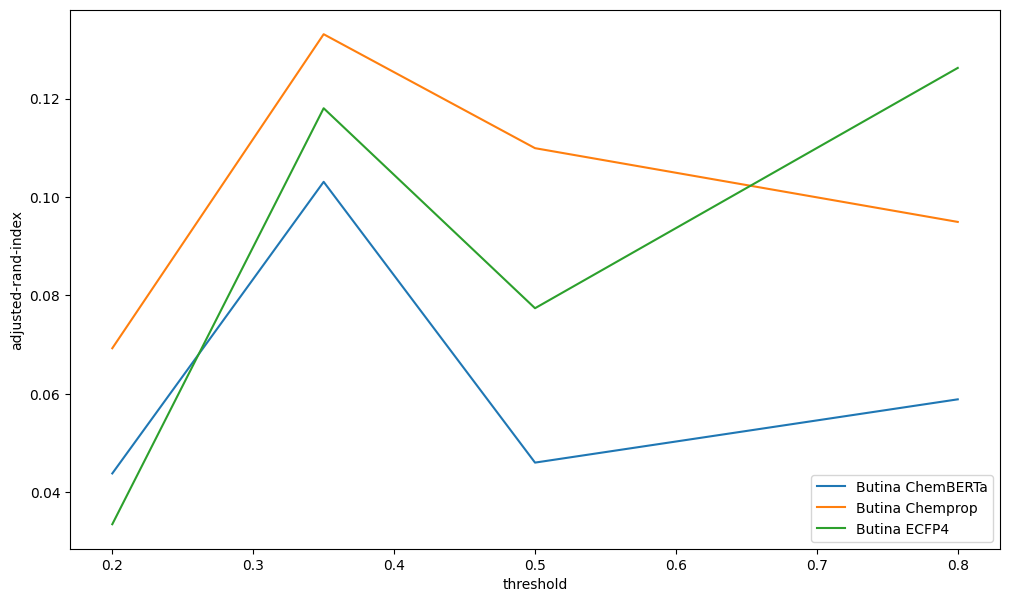

In [70]:
fig, ax = plot_metric_from_project(
    df=processed_result,
    metric=metric,
    metric_x_index_name=metric_x_index_name,
    # run_name_filter_substring=run_name_filter_substring,
    show_title=False,
    method="matplotlib",
    save_path=save_path,
)

fig